In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
csv_file_path = '/content/drive/MyDrive/export_news.csv'
df = pd.read_csv(csv_file_path, delimiter='\t')
print(df)

         id  page_id                                                url  \
0         1       17  https://www.tgju.org/news/category/93966/%D8%A...   
1         2       18  https://www.tgju.org/news/2638144/%D8%AA%D8%AD...   
2         3       19             https://www.tgju.org/news/2638096/2-49   
3         4       21  https://www.tgju.org/news/2638081/%DA%86%D8%B4...   
4         5       23  https://www.tgju.org/news/2638059/%D8%A2%DB%8C...   
...     ...      ...                                                ...   
4770  24599   338583  https://www.tgju.org/news/tag/landing/profile/...   
4771  23580   338563  https://www.tgju.org/news/tag/landing/profile/...   
4772  23582   338564  https://www.tgju.org/news/tag/landing/profile/...   
4773  21518   106770  https://www.tgju.org/news/tag/%DA%AF%D8%B2%D8%...   
4774  21519   106771  https://www.tgju.org/news/tag/%D9%82%DB%8C%D9%...   

                                        head            author  \
0                                

In [2]:
df

,id,page_id,url,head,author,category,date,tags,text,summary
0,1,17,https://www.tgju.org/news/category/93966/%D8%A...,NaN,NaN,اخبار ارزهای دیجیتال,NaN,NaN,NaN,NaN
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,امیر رضا مصطفایی,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,بیت‌کوین|سطح حمایت|سطح مقاومت|ریپل|ارزهای دیجی...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کر...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,معصومه دانش,اخبار طلا و سکه,یکشنبه 25 تیر 1402,بهای طلا|بهای نقره|بازار طلا|نرخ بهره|افزایش ن...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از «ک...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,امیر رضا مصطفایی,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|بیت کوین|اتریوم|ارزهای دیجیتال|اصلاح قیمت...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از بی...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,امیر رضا مصطفایی,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|کمیسیون بورس و اوراق بهادار آمریکا|دادگاه...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...
...,...,...,...,...,...,...,...,...,...,...
4770,24599,338583,https://www.tgju.org/news/tag/landing/profile/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4771,23580,338563,https://www.tgju.org/news/tag/landing/profile/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4772,23582,338564,https://www.tgju.org/news/tag/landing/profile/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4773,21518,106770,https://www.tgju.org/news/tag/%DA%AF%D8%B2%D8%...,NaN,NaN,گزارش‌ بازارها,NaN,NaN,NaN,NaN


In [3]:
#show full text randomly
pd.set_option('display.max_columns', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

desired_field = df.at[60, 'text']
print(desired_field)


nan


In [ ]:
desired_field = df.at[60, 'tags']
print(desired_field)

گزارش قیمت سکه|قیمت سکه


In [ ]:
import re
hashtag_pattern = r"#\w+"

hashtags_list = re.findall(hashtag_pattern, df.at[60,'text'])

dfhashtags = pd.DataFrame(hashtags_list, columns=['text'])

print(dfhashtags)

              text
0       #سکه_امامی
1  #سکه_بهار_آزادی
2         #نیم_سکه
3         #ربع_سکه
4        #سکه_گرمی
5        #قیمت_سکه


In [ ]:
desired_field = df.at[60, 'tags']
print(desired_field)

گزارش قیمت سکه|قیمت سکه


In [ ]:
description = df.describe()
print(description)

               id       page_id
count   90.000000     90.000000
mean    79.433333   4217.033333
std     53.325174  15022.424333
min      1.000000     17.000000
25%     25.500000     47.000000
50%     84.500000    137.500000
75%    119.750000    180.500000
max    175.000000  65072.000000


In [ ]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("ستون‌های غیر عددی:")
print(non_numeric_columns)

ستون‌های غیر عددی:
Index(['url', 'head', 'author', 'category', 'date', 'tags', 'text', 'summary'], dtype='object')


In [ ]:
null_values = df.isnull().sum()
print(null_values)

id           0
page_id      0
url          0
head        48
author      63
category    14
date        48
tags        55
text        48
summary     48
dtype: int64


In [ ]:
special_characters = ['?', '!', 'nan','Unknown','Invalid','NAN','Nan','None','#']
for column in df.columns:
    counts = {}
    for char in special_characters:
        counts[char] = df[column].apply(lambda x: str(x).count(char)).sum()
    print(f"ستون {column}: {counts}")

ستون id: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون page_id: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون url: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون head: {'?': 0, '!': 5, 'nan': 48, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون author: {'?': 0, '!': 0, 'nan': 63, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون category: {'?': 0, '!': 0, 'nan': 14, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون date: {'?': 0, '!': 0, 'nan': 48, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون tags: {'?': 0, '!': 0, 'nan': 55, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون text: {'?': 0, '!': 2, 'nan': 48, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 27}
ستون summary: {'?': 0, '!': 0, 'nan': 48, 

In [4]:
df = df.dropna(subset=['text', 'category','summary'])


In [5]:
df.drop('author', axis=1, inplace=True)


<ipython-input-5-6a94ca14da87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('author', axis=1, inplace=True)


In [7]:
special_characters = ['?', '!', 'nan','Unknown','Invalid','NAN','Nan','None','#']
for column in df.columns:
    counts = {}
    for char in special_characters:
        counts[char] = df[column].apply(lambda x: str(x).count(char)).sum()
    print(f"ستون {column}: {counts}")

ستون id: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون page_id: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون url: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون head: {'?': 0, '!': 54, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون category: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون date: {'?': 0, '!': 0, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون tags: {'?': 0, '!': 0, 'nan': 253, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}
ستون text: {'?': 0, '!': 73, 'nan': 12, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 1, 'None': 0, '#': 104}
ستون summary: {'?': 0, '!': 14, 'nan': 0, 'Unknown': 0, 'Invalid': 0, 'NAN': 0, 'Nan': 0, 'None': 0, '#': 0}


In [6]:
df

,id,page_id,url,head,category,date,tags,text,summary
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,بیت‌کوین|سطح حمایت|سطح مقاومت|ریپل|ارزهای دیجی...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کر...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,بهای طلا|بهای نقره|بازار طلا|نرخ بهره|افزایش ن...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از «ک...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|بیت کوین|اتریوم|ارزهای دیجیتال|اصلاح قیمت...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از بی...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|کمیسیون بورس و اوراق بهادار آمریکا|دادگاه...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,اتریوم|نهنگ|ریپل|کمیسیون بورس و اوراق بهادار آ...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از یو...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...
...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,بهای طلا|نرخ بهره|افزایش نرخ بهره|دلار آمریکا|...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از ای...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,ریپل|ارز دیجیتال|تعداد آدرس های فعال روزانه|مق...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...


In [8]:
import pandas as pd

# Assuming you have already defined the DataFrame 'df' with a 'text' column

# Define the regular expression pattern to match hashtags
hashtag_pattern = r"#\w+"

# Use the str.findall() method to extract hashtags from the 'text' column and create a new column 'hashtags'
df['hashtags'] = df['text'].str.findall(hashtag_pattern)

# Display the DataFrame with the new 'hashtags' column
print(df)

         id  page_id                                                url  \
1         2       18  https://www.tgju.org/news/2638144/%D8%AA%D8%AD...   
2         3       19             https://www.tgju.org/news/2638096/2-49   
3         4       21  https://www.tgju.org/news/2638081/%DA%86%D8%B4...   
4         5       23  https://www.tgju.org/news/2638059/%D8%A2%DB%8C...   
33       29       46  https://www.tgju.org/news/2638192/%D9%86%D9%87...   
...     ...      ...                                                ...   
4508  17153    53094  https://www.tgju.org/news/2634169/%D9%86%D9%88...   
4509  23183   102774  https://www.tgju.org/news/2638055/%DA%AF%D8%B2...   
4510  17157    53098  https://www.tgju.org/news/2634159/%D9%BE%DB%8C...   
4511  23185   102776  https://www.tgju.org/news/2638048/%DA%AF%D8%B2...   
4514  17161    53102  https://www.tgju.org/news/2634146/%D8%AA%D8%AF...   

                                                head              category  \
1             تحلیل و

<ipython-input-8-5f82939de02b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['text'].str.findall(hashtag_pattern)


In [9]:
df

,id,page_id,url,head,category,date,tags,text,summary,hashtags
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,بیت‌کوین|سطح حمایت|سطح مقاومت|ریپل|ارزهای دیجی...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کر...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,[]
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,بهای طلا|بهای نقره|بازار طلا|نرخ بهره|افزایش ن...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از «ک...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,[]
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|بیت کوین|اتریوم|ارزهای دیجیتال|اصلاح قیمت...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از بی...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,[]
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|کمیسیون بورس و اوراق بهادار آمریکا|دادگاه...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,[]
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,اتریوم|نهنگ|ریپل|کمیسیون بورس و اوراق بهادار آ...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از یو...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,[]
...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,بهای طلا|نرخ بهره|افزایش نرخ بهره|دلار آمریکا|...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از ای...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,[]
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[#قیمت, #ارزهای_دیجیتال]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,ریپل|ارز دیجیتال|تعداد آدرس های فعال روزانه|مق...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,[]
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[#قیمت, #ارزهای_دیجیتال]"


In [10]:
# Use the str.replace() method to remove the '#' symbol from each hashtag in the lists
hashtags_lists = df['hashtags'].apply(lambda hashtags: [tag.replace('#', '') for tag in hashtags])

# Create a new column 'hashtags' in the DataFrame with the cleaned hashtags
df['hashtags'] = hashtags_lists

# Display the DataFrame with the new 'hashtags' column
df

<ipython-input-10-be90250f0867>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = hashtags_lists


,id,page_id,url,head,category,date,tags,text,summary,hashtags
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,بیت‌کوین|سطح حمایت|سطح مقاومت|ریپل|ارزهای دیجی...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کر...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,[]
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,بهای طلا|بهای نقره|بازار طلا|نرخ بهره|افزایش ن...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از «ک...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,[]
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|بیت کوین|اتریوم|ارزهای دیجیتال|اصلاح قیمت...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از بی...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,[]
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|کمیسیون بورس و اوراق بهادار آمریکا|دادگاه...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,[]
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,اتریوم|نهنگ|ریپل|کمیسیون بورس و اوراق بهادار آ...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از یو...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,[]
...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,بهای طلا|نرخ بهره|افزایش نرخ بهره|دلار آمریکا|...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از ای...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,[]
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,ریپل|ارز دیجیتال|تعداد آدرس های فعال روزانه|مق...,به گزارششبکه اطلاع‌رسانی طلا و ارزبه نقل از کو...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,[]
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,🔸 #قیمت #ارزهای_دیجیتال‏ ........................,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]"


In [11]:
!pip install hazm


In [12]:
import copy
alphabet = set()

for _, row in df.iterrows():
    text = row['text']
    for char in text:
        alphabet.add(char)
ok_alphabet = ' ' 'ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی' 'ۀءآأؤإئة' '\u200c'
# '0123456789' 'abcdefghijklmnopqrstuvwxyz' 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' '.?!,،:;' '#'

other_alphabet = copy.copy(alphabet)

for char in ok_alphabet:
    if char in other_alphabet:
        other_alphabet.remove(char)

In [13]:
import hazm
import re

stop_words = hazm.stopwords_list()
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()

# mappings
# EXTENDED ARABIC-INDIC DIGIT
mappings1 = [('۰', '0'), ('۱', '1'), ('۲', '2'), ('۳', '3'), ('۴', '4'), ('۵', '5'), ('۶', '6'), ('۷', '7'), ('۸', '8'), ('۹', '9')]

# ARABIC-INDIC DIGIT
mappings2 = [('٠', '0'), ('١', '1'), ('٢', '2'), ('٣', '3'), ('٤', '4'), ('٥', '5'), ('٦', '6'), ('٧', '7'), ('٨', '8'), ('٩', '9')]

# Equivalent letters
mappings3 = [
    ('ە', 'ه'), # ARABIC LETTER AE, ARABIC LETTER HEH
    ('ہ', 'ه'), # ARABIC LETTER HEH GOAL, ARABIC LETTER HEH
    ('ٸ', 'ی'), # ARABIC LETTER HIGH HAMZA YEH, ARABIC LETTER FARSI YEH
    ('ھ', 'ه'), # ARABIC LETTER HEH DOACHASHMEE, ARABIC LETTER HEH
    ('ى', 'ی'), # ARABIC LETTER ALEF MAKSURA, ARABIC LETTER FARSI YEH
    ('ں', 'ن'), # ARABIC LETTER NOON GHUNNA, ARABIC LETTER NOON
    ('ے', 'ی'), # ARABIC LETTER YEH BARREE, ARABIC LETTER FARSI YEH
]
def preprocess(text, mappings):
    # replace with mappings
    for x, y in mappings:
        text = text.replace(x, y)

    # replace specific phrases
    text = text.replace('بیشتر بخوانید', '')
    text = text.replace('به گزارش', '')
    text = text.replace('به نقل از', '')

    # remove text inside parantheses or brackets
    text = re.sub(r'\([^)]*\)|\[[^\]]*\]', '', text)

    # keep words longer than 2
    isnum = re.compile('^\d+$')
    text = " ".join([t for t in hazm.word_tokenize(text) if (len(t) > 2) or (re.match(isnum, t))])

    # replace numbers and English chars with #
    # text = re.sub(r'[a-zA-Z0-9]+', '#', text)
    # replace numbers and English chars with none
    text = re.sub(r'[a-zA-Z0-9]+', '', text)

    # normalize
    text = normalizer.normalize(text)

    # filter out characters not in ok_alphabet
    text = "".join([t for t in text if t in ok_alphabet])

    # filter out stop words
    text = " ".join([t for t in hazm.word_tokenize(text) if t not in stop_words]) # .split() didn't properly remove stopwords

    # stem/lemmatize
    text = " ".join([lemmatizer.lemmatize(t).split('#')[0] for t in hazm.word_tokenize(text)])

    return text
df['text'] = df['text'].apply(lambda text: preprocess(text=text, mappings=mappings1+mappings2+mappings3))

<ipython-input-13-6abebca3c20e>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda text: preprocess(text=text, mappings=mappings1+mappings2+mappings3))


In [14]:
from hazm import word_tokenize
from collections import Counter

def extract_keywords(text, top_n=5):
    words = word_tokenize(text)

    word_frequency = Counter(words)

    # کلمات با تکرار بیشتر به ترتیب کاهشی جستجو می‌شوند
    keywords = [word for word, _ in word_frequency.most_common(top_n)]

    return keywords

# در اینجا df یک DataFrame شماست که در آن ستون 'text' متن‌های پیش‌پردازش شده قرار دارند
# شما می‌توانید نام دیگری که برای DataFrame خود استفاده کرده‌اید را جایگزین کنید
# مثلا: data['text'] یا ... و غیره
df['keywords'] = df['text'].apply(lambda text: extract_keywords(text=text, top_n=5))
df


<ipython-input-14-caecf0816d78>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['text'].apply(lambda text: extract_keywords(text=text, top_n=5))


,id,page_id,url,head,category,date,tags,text,summary,hashtags,keywords
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,بیت‌کوین|سطح حمایت|سطح مقاومت|ریپل|ارزهای دیجی...,شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,[],"[کوین, دلار, بیت, سطح, قیمت]"
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,بهای طلا|بهای نقره|بازار طلا|نرخ بهره|افزایش ن...,شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,[],"[نقره, طلا, فدرال, رزرو, بازار]"
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|بیت کوین|اتریوم|ارزهای دیجیتال|اصلاح قیمت...,شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,[],"[سطح, قیمت, کوین, دلار, ماه]"
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,ریپل|کمیسیون بورس و اوراق بهادار آمریکا|دادگاه...,شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,[],"[ریپل, قیمت, دلار, سطح, اوراق]"
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,اتریوم|نهنگ|ریپل|کمیسیون بورس و اوراق بهادار آ...,شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,[],"[قیمت, اتریوم, دلار, نهنگ, ارز]"
...,...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,بهای طلا|نرخ بهره|افزایش نرخ بهره|دلار آمریکا|...,شبکه اطلاع‌رسانی طلا ارز اینوستینگ قیمتطلادر ر...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,[],"[بانک, افزایش, مرکزی, تورم, ماه]"
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,ریپل|ارز دیجیتال|تعداد آدرس های فعال روزانه|مق...,شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا تحلیلگر مشه...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,[],"[ریپل, قیمت, افزایش, درصد, آدرس‌های]"
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,گزارش قیمت ارزهای دیجیتال|قیمت ارزهای دیجیتال|...,قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"


In [15]:
# نمایش کلمات کلیدی هر متن
for index, row in df.iterrows():
    print(f"متن {index + 1} - کلمات کلیدی:")
    print(row['keywords'])
    print()


متن 2 - کلمات کلیدی:
['کوین', 'دلار', 'بیت', 'سطح', 'قیمت']

متن 3 - کلمات کلیدی:
['نقره', 'طلا', 'فدرال', 'رزرو', 'بازار']

متن 4 - کلمات کلیدی:
['سطح', 'قیمت', 'کوین', 'دلار', 'ماه']

متن 5 - کلمات کلیدی:
['ریپل', 'قیمت', 'دلار', 'سطح', 'اوراق']

متن 34 - کلمات کلیدی:
['قیمت', 'اتریوم', 'دلار', 'نهنگ', 'ارز']

متن 35 - کلمات کلیدی:
['قیمت', 'ریپل', 'کوین', 'بازار', 'افزایش']

متن 36 - کلمات کلیدی:
['طلا', 'درصد', 'هفته', 'کاهش', 'دلار']

متن 37 - کلمات کلیدی:
['سطح', 'قیمت', 'یورو', 'دلار', 'فدرال']

متن 41 - کلمات کلیدی:
['اندیکاتور', 'نمودار', 'نوسان', 'واقعی', 'محدوده']

متن 44 - کلمات کلیدی:
['دلار', 'افزایش', 'کاهش', 'درصد', 'سطح']

متن 48 - کلمات کلیدی:
['افزایش', 'قیمت', 'نقره', 'درصد', 'تحلیل']

متن 56 - کلمات کلیدی:
['ریپل', 'قیمت', 'نزول', 'کاهش', 'حرکت']

متن 59 - کلمات کلیدی:
['قیمت', 'بستهشدن', 'نوسان', 'مقادیر', 'قبل']

متن 60 - کلمات کلیدی:
['دلار', 'نقره', 'فشار', 'صعود', 'دلیل']

متن 65 - کلمات کلیدی:
['کوین', 'سولانا', 'درصد', 'بازار', 'ریپل']

متن 67 - کلمات کلیدی:

In [16]:
df['tags'] = df['tags'].apply(lambda x: x.split('|') if not pd.isnull(x) else [])
df

<ipython-input-16-4f4d3368de7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(lambda x: x.split('|') if not pd.isnull(x) else [])


,id,page_id,url,head,category,date,tags,text,summary,hashtags,keywords
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...",شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,[],"[کوین, دلار, بیت, سطح, قیمت]"
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...",شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,[],"[نقره, طلا, فدرال, رزرو, بازار]"
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...",شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,[],"[سطح, قیمت, کوین, دلار, ماه]"
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,[],"[ریپل, قیمت, دلار, سطح, اوراق]"
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...",شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,[],"[قیمت, اتریوم, دلار, نهنگ, ارز]"
...,...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,"[بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...",شبکه اطلاع‌رسانی طلا ارز اینوستینگ قیمتطلادر ر...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,[],"[بانک, افزایش, مرکزی, تورم, ماه]"
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,"[ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا تحلیلگر مشه...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,[],"[ریپل, قیمت, افزایش, درصد, آدرس‌های]"
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"


In [17]:
import pandas as pd

def is_empty_hashtags(cell_value):
    return len(cell_value) == 0

for index, row in df.iterrows():
    if is_empty_hashtags(row['hashtags']):
        if not is_empty_hashtags(row['tags']):
            df.at[index, 'hashtags'] = row['tags']
        else:
            df.at[index, 'hashtags'] = row['keywords']

df

,id,page_id,url,head,category,date,tags,text,summary,hashtags,keywords
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...",شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...","[کوین, دلار, بیت, سطح, قیمت]"
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...",شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...","[نقره, طلا, فدرال, رزرو, بازار]"
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...",شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...","[سطح, قیمت, کوین, دلار, ماه]"
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...","[ریپل, قیمت, دلار, سطح, اوراق]"
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...",شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...","[قیمت, اتریوم, دلار, نهنگ, ارز]"
...,...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,"[بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...",شبکه اطلاع‌رسانی طلا ارز اینوستینگ قیمتطلادر ر...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,"[بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...","[بانک, افزایش, مرکزی, تورم, ماه]"
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,"[ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا تحلیلگر مشه...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,"[ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...","[ریپل, قیمت, افزایش, درصد, آدرس‌های]"
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"


In [ ]:
#MONGOOO

In [ ]:
!pip install pymongo

In [ ]:
from pymongo import MongoClient

In [ ]:
#insert data
data_to_insert = df.to_dict(orient='records')

mongo_url = "localhost:27017"
client = MongoClient(mongo_url)
db = client['BigDataFinalProject']
collection = db['News_Text']

inserted_data = collection.insert_many(data_to_insert)

print("Inserted document IDs:", inserted_data.inserted_ids)

Inserted document IDs: [ObjectId('64b85753e183edf4fa77afd3'), ObjectId('64b85753e183edf4fa77afd4'), ObjectId('64b85753e183edf4fa77afd5'), ObjectId('64b85753e183edf4fa77afd6'), ObjectId('64b85753e183edf4fa77afd7'), ObjectId('64b85753e183edf4fa77afd8'), ObjectId('64b85753e183edf4fa77afd9'), ObjectId('64b85753e183edf4fa77afda'), ObjectId('64b85753e183edf4fa77afdb'), ObjectId('64b85753e183edf4fa77afdc'), ObjectId('64b85753e183edf4fa77afdd'), ObjectId('64b85753e183edf4fa77afde'), ObjectId('64b85753e183edf4fa77afdf'), ObjectId('64b85753e183edf4fa77afe0'), ObjectId('64b85753e183edf4fa77afe1'), ObjectId('64b85753e183edf4fa77afe2'), ObjectId('64b85753e183edf4fa77afe3'), ObjectId('64b85753e183edf4fa77afe4'), ObjectId('64b85753e183edf4fa77afe5'), ObjectId('64b85753e183edf4fa77afe6'), ObjectId('64b85753e183edf4fa77afe7'), ObjectId('64b85753e183edf4fa77afe8'), ObjectId('64b85753e183edf4fa77afe9'), ObjectId('64b85753e183edf4fa77afea'), ObjectId('64b85753e183edf4fa77afeb'), ObjectId('64b85753e183edf4

In [ ]:
#read data
cursor = collection.find({})
df_mongo = pd.DataFrame(list(cursor))

df_mongo

,_id,category,date,hashtags,head,id,keywords,page_id,summary,tags,text,url
0,64b83475b4e9a3926f076485,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...",تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,2,"[کوین, دلار, بیت, سطح, قیمت]",18,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...",شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...
1,64b83475b4e9a3926f076486,اخبار طلا و سکه,یکشنبه 25 تیر 1402,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...",خرس‌های طلا در کمین!,3,"[نقره, طلا, فدرال, رزرو, بازار]",19,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...",شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...,https://www.tgju.org/news/2638096/2-49
2,64b83475b4e9a3926f076487,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...",چشم‌انداز بیت کوین تا پایان ماه جولای,4,"[سطح, قیمت, کوین, دلار, ماه]",21,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...",شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...,https://www.tgju.org/news/2638081/%DA%86%D8%B4...
3,64b83475b4e9a3926f076488,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...",آیا اکنون وقت خرید ریپل است؟,5,"[ریپل, قیمت, دلار, سطح, اوراق]",23,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...
4,64b83475b4e9a3926f076489,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...",نهنگ‌ها در حال فروش اتریوم!,29,"[قیمت, اتریوم, دلار, نهنگ, ارز]",46,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...",شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...,https://www.tgju.org/news/2638192/%D9%86%D9%87...
5,64b83475b4e9a3926f07648a,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[بیت‌کوین, ریپل, ارزهای دیجیتال, بلک راک, فیدل...",تحلیل و پیش‌بینی قیمت ریپل؛ 25 تیر,30,"[قیمت, ریپل, کوین, بازار, افزایش]",50,پس از پیروزی نسبی ریپل در دادگاه،‌ قیمت آن به ...,"[بیت‌کوین, ریپل, ارزهای دیجیتال, بلک راک, فیدل...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا قیمتبیت کوی...,https://www.tgju.org/news/2638164/%D8%AA%D8%AD...
6,64b83475b4e9a3926f07648b,اخبار طلا و سکه,یکشنبه 25 تیر 1402,"[دلار آمریکا, بهای طلا, حرکت قیمت, ارقام خرده‌...",طلا، ناکام در صعود,31,"[درصد, طلا, هفته, کاهش, دلار]",54,به دلیل کاهش بازده اوراق قرضه خزانه‌داری و در ...,"[دلار آمریکا, بهای طلا, حرکت قیمت, ارقام خرده‌...",شبکه اطلاع‌رسانی طلا ارز سایت اف‌ایکس استر یاد...,https://www.tgju.org/news/2638150/33
7,64b83475b4e9a3926f07648c,اخبار ارزی,یکشنبه 25 تیر 1402,"[یورو, دلار آمریکا, نرخ بهره, افزایش نرخ بهره,...",یورو/دلار و رسیدن به آرامش نسبی,32,"[سطح, قیمت, فدرال, رزرو, ایالات]",64,در حالی که دلار آمریکا تحت فشار سنگینی قرار دا...,"[یورو, دلار آمریکا, نرخ بهره, افزایش نرخ بهره,...",شبکه اطلاع‌رسانی طلا ارز اف‌ایکس استر یورو روز...,https://www.tgju.org/news/2638134/1-36
8,64b83475b4e9a3926f07648d,راهنمای جامع اندیکاتورها,چهارشنبه 25 اسفند 1400,"[اندیکاتور, نوسان ولز وایلدر, بازگشت, روند باز...",درس ۱۱۸ : نوسان ولز وایلدر,148,"[اندیکاتور, نمودار, نوسان, واقعی, محدوده]",193,در این درس، توضیحات مختصری درباره‌ی نوسان ولز ...,"[اندیکاتور, نوسان ولز وایلدر, بازگشت, روند باز...",نوسان ولز وایلدر اندیکاتور هم‌پوشان صرفا نمودا...,https://www.tgju.org/news/2403954/%D8%AF%D8%B1...
9,64b83475b4e9a3926f07648e,اخبار ارزی,یکشنبه 25 تیر 1402,"[دلار آمریکا, ین ژاپن, نرخ بهره, افزایش نرخ به...",بدترین عملکرد برای دلار,41,"[افزایش, کاهش, دلار, درصد, سطح]",80,دلار آمریکا که در پايین‌ترین سطح 15 ماهه‌ی خود...,"[دلار آمریکا, ین ژاپن, نرخ بهره, افزایش نرخ به...",شبکه اطلاع‌رسانی طلا ارز اینوستینگ دلار آمریکا...,https://www.tgju.org/news/2638067/1-35


###Step 6

In [18]:
df

,id,page_id,url,head,category,date,tags,text,summary,hashtags,keywords
1,2,18,https://www.tgju.org/news/2638144/%D8%AA%D8%AD...,تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...",شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...,اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...,"[بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...","[کوین, دلار, بیت, سطح, قیمت]"
2,3,19,https://www.tgju.org/news/2638096/2-49,خرس‌های طلا در کمین!,اخبار طلا و سکه,یکشنبه 25 تیر 1402,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...",شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...,گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...,"[بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...","[نقره, طلا, فدرال, رزرو, بازار]"
3,4,21,https://www.tgju.org/news/2638081/%DA%86%D8%B4...,چشم‌انداز بیت کوین تا پایان ماه جولای,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...",شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...,قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...,"[ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...","[سطح, قیمت, کوین, دلار, ماه]"
4,5,23,https://www.tgju.org/news/2638059/%D8%A2%DB%8C...,آیا اکنون وقت خرید ریپل است؟,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...,با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...,"[ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...","[ریپل, قیمت, دلار, سطح, اوراق]"
33,29,46,https://www.tgju.org/news/2638192/%D9%86%D9%87...,نهنگ‌ها در حال فروش اتریوم!,اخبار ارزهای دیجیتال,یکشنبه 25 تیر 1402,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...",شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...,داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...,"[اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...","[قیمت, اتریوم, دلار, نهنگ, ارز]"
...,...,...,...,...,...,...,...,...,...,...,...
4508,17153,53094,https://www.tgju.org/news/2634169/%D9%86%D9%88...,نوسان قیمت طلا، در مسیر مثبت,اخبار طلا و سکه,سه شنبه 6 تیر 1402,"[بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...",شبکه اطلاع‌رسانی طلا ارز اینوستینگ قیمتطلادر ر...,در حالی که فعالان بازار برای حصول به سرنخ‌هایی...,"[بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...","[بانک, افزایش, مرکزی, تورم, ماه]"
4509,23183,102774,https://www.tgju.org/news/2638055/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"
4510,17157,53098,https://www.tgju.org/news/2634159/%D9%BE%DB%8C...,پیش‌بینی رشد 20 درصدی قیمت ریپل,اخبار ارزهای دیجیتال,سه شنبه 6 تیر 1402,"[ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...",شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا تحلیلگر مشه...,افزایش اخیر میزان فعالیت‌های آن‌چین و وجود همب...,"[ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...","[ریپل, قیمت, افزایش, درصد, آدرس‌های]"
4511,23185,102776,https://www.tgju.org/news/2638048/%DA%AF%D8%B2...,گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402,گزارش‌ بازارها,یکشنبه 25 تیر 1402,"[گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...",قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...,امروز یکشنبه 25 تیر 1402 در بازار داخلی ارزهای...,"[قیمت, ارزهای_دیجیتال]","[تتر, ریال, کوین, بیت, اتریوم]"


In [19]:
df['hashtags']

1       [بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...
2       [بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...
3       [ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...
4       [ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...
33      [اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...
                              ...                        
4508    [بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...
4509                               [قیمت, ارزهای_دیجیتال]
4510    [ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...
4511                               [قیمت, ارزهای_دیجیتال]
4514    [دلار آمریکا, شاخص دلار آمریکا, ین ژاپن, نرخ ب...
Name: hashtags, Length: 588, dtype: object

In [20]:
# تبدیل هشتگ‌ها به سطرهای جداگانه و ایجاد بردارهای One-Hot Encoding
hashtags_series = df['hashtags'].apply(pd.Series).stack()
df_encoded = pd.get_dummies(hashtags_series, prefix='', prefix_sep='').groupby(level=0).max()

# اضافه کردن ستون‌های One-Hot Encoding به دیتافریم اصلی
df = pd.concat([df, df_encoded], axis=1)

print(df)

         id  page_id                                                url  \
1         2       18  https://www.tgju.org/news/2638144/%D8%AA%D8%AD...   
2         3       19             https://www.tgju.org/news/2638096/2-49   
3         4       21  https://www.tgju.org/news/2638081/%DA%86%D8%B4...   
4         5       23  https://www.tgju.org/news/2638059/%D8%A2%DB%8C...   
33       29       46  https://www.tgju.org/news/2638192/%D9%86%D9%87...   
...     ...      ...                                                ...   
4508  17153    53094  https://www.tgju.org/news/2634169/%D9%86%D9%88...   
4509  23183   102774  https://www.tgju.org/news/2638055/%DA%AF%D8%B2...   
4510  17157    53098  https://www.tgju.org/news/2634159/%D9%BE%DB%8C...   
4511  23185   102776  https://www.tgju.org/news/2638048/%DA%AF%D8%B2...   
4514  17161    53102  https://www.tgju.org/news/2634146/%D8%AA%D8%AF...   

                                                head              category  \
1             تحلیل و

In [21]:
df

id  page_id                                                url  \
1         2       18  https://www.tgju.org/news/2638144/%D8%AA%D8%AD...   
2         3       19             https://www.tgju.org/news/2638096/2-49   
3         4       21  https://www.tgju.org/news/2638081/%DA%86%D8%B4...   
4         5       23  https://www.tgju.org/news/2638059/%D8%A2%DB%8C...   
33       29       46  https://www.tgju.org/news/2638192/%D9%86%D9%87...   
...     ...      ...                                                ...   
4508  17153    53094  https://www.tgju.org/news/2634169/%D9%86%D9%88...   
4509  23183   102774  https://www.tgju.org/news/2638055/%DA%AF%D8%B2...   
4510  17157    53098  https://www.tgju.org/news/2634159/%D9%BE%DB%8C...   
4511  23185   102776  https://www.tgju.org/news/2638048/%DA%AF%D8%B2...   
4514  17161    53102  https://www.tgju.org/news/2634146/%D8%AA%D8%AF...   

                                                head              category  \
1             تحلیل و پیش‌بینی قیمت بیت‌کوین؛ 25 تیر  اخبار ارزهای دیجیتال   
2                               خرس‌های طلا در کمین!       اخبار طلا و سکه   
3              چشم‌انداز بیت کوین تا پایان ماه جولای  اخبار ارزهای دیجیتال   
4                       آیا اکنون وقت خرید ریپل است؟  اخبار ارزهای دیجیتال   
33                       نهنگ‌ها در حال فروش اتریوم!  اخبار ارزهای دیجیتال   
...                                              ...                   ...   
4508                    نوسان قیمت طلا، در مسیر مثبت       اخبار طلا و سکه   
4509  گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402        گزارش‌ بازارها   
4510                 پیش‌بینی رشد 20 درصدی قیمت ریپل  اخبار ارزهای دیجیتال   
4511  گزارش قیمت ارزهای دیجیتال / یکشنبه 25 تیر 1402        گزارش‌ بازارها   
4514                 تداوم نوسان ارزها در برابر دلار            اخبار ارزی   

                    date                                               tags  \
1     یکشنبه 25 تیر 1402  [بیت‌کوین, سطح حمایت, سطح مقاومت, ریپل, ارزهای...   
2     یکشنبه 25 تیر 1402  [بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افز...   
3     یکشنبه 25 تیر 1402  [ریپل, بیت کوین, اتریوم, ارزهای دیجیتال, اصلاح...   
4     یکشنبه 25 تیر 1402  [ریپل, کمیسیون بورس و اوراق بهادار آمریکا, داد...   
33    یکشنبه 25 تیر 1402  [اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهاد...   
...                  ...                                                ...   
4508  سه شنبه 6 تیر 1402  [بهای طلا, نرخ بهره, افزایش نرخ بهره, دلار آمر...   
4509  یکشنبه 25 تیر 1402  [گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...   
4510  سه شنبه 6 تیر 1402  [ریپل, ارز دیجیتال, تعداد آدرس های فعال روزانه...   
4511  یکشنبه 25 تیر 1402  [گزارش قیمت ارزهای دیجیتال, قیمت ارزهای دیجیتا...   
4514  سه شنبه 6 تیر 1402  [دلار آمریکا, شاخص دلار آمریکا, ین ژاپن, نرخ ب...   

                                                   text  \
1     شبکه اطلاع‌رسانی طلا ارز کریپتونیوز قیمتبیت کو...   
2     شبکه اطلاع‌رسانی طلا ارز کیتکونیوز تورم ضعیف ه...   
3     شبکه اطلاع‌رسانی طلا ارز بیت‌کوین‌دات‌کام گذشت...   
4     شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا کمیسیون بور...   
33    شبکه اطلاع‌رسانی طلا ارز یوتودی داده نشان نهنگ...   
...                                                 ...   
4508  شبکه اطلاع‌رسانی طلا ارز اینوستینگ قیمتطلادر ر...   
4509  قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...   
4510  شبکه اطلاع‌رسانی طلا ارز کوین‌پدیا تحلیلگر مشه...   
4511  قیمت ارزهایدیجیتال بیت کوین ریال بیت کوین تتر ...   
4514  شبکه اطلاع‌رسانی طلا ارز رویترز دلار آمریکاروز...   

                                                summary  \
1     اقدام تازه‌ی بنک‌ آو امریکا و تحولات اخیر در پ...   
2     گرچه طلا قیمت‌های طلا در هفته‌های اخیر رشد داش...   
3     قیمت بیت‌کوین تحت تاثیر تحولات اخیر در پرونده‌...   
4     با انتشار خبری مبنی بر صدور یک حکم مطلوب برای ...   
33    داده‌های بازار نشان می‌دهند، علی‌رغم صعود موقت...   
...                                                 ...   
4508  در حالی که فعالان بازار برای حصول به سرنخ‌هایی...   
4509  امروز یکشنبه 25 تیر 1402 در بازار د

In [ ]:
#pandas
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

df['hashtags_str'] = df['hashtags'].apply(lambda x: ', '.join(x))

X = df['text']
y = df['hashtags_str']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# آموزش مدل SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.1111111111111111
                                                                                                                                                                          precision    recall  f1-score   support

                              اتریوم, نهنگ, ریپل, کمیسیون بورس و اوراق بهادار آمریکا, دادگاه, قیمت ریپل, ارز دیجیتال, بازار کریپتو, التکوین, صرافی, بیت‌کوین, اخبار ویژه       0.00      0.00      0.00         1
                                                                                            اندیکاتور, نوسان ولز وایلدر, بازگشت, روند بازار, محدوده واقعی, تحلیل تکنیکال       0.00      0.00      0.00         1
بهای طلا, معاملات آسیایی, دلار آمریکا, افزایش نرخ بهره, نرخ بهره, بازار کار, تقاضا, رکود اقتصادی, فلز زرد امن, ارقام تورم, نرخ بیکاری, اخبار ویژه, تحلیل بنیادین, خبر یک       0.00      0.00      0.00         1
                                                                                                                                  

C:\Users\Kosar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=e5aee3af17f7b3227d08ca4f060cea4d903643e9e854f023c2306efc0d95a427
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [35]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable

os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [29]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import Word2Vec, Tokenizer, StringIndexer
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# ایجاد یک نمونه از کلاس SparkSession
spark = SparkSession.builder.appName("MLPC_Word2Vec").getOrCreate()

# تبدیل داده‌های pandas به یک DataFrame از PySpark
data = spark.createDataFrame(df)

# تبدیل لیست هشتگ‌ها به یک رشته جدا‌شده با کاما
join_hashtags = udf(lambda x: ', '.join(x), StringType())
data = data.withColumn('hashtags_str', join_hashtags('hashtags'))

# تقسیم داده‌ها به داده‌های آموزش و آزمون
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=42)

# تبدیل متن به لغات
tokenizer = Tokenizer(inputCol="text", outputCol="words")
train_words = tokenizer.transform(train_data)
test_words = tokenizer.transform(test_data)

# ساخت مدل Word2Vec
word2Vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="features")
word2Vec_model = word2Vec.fit(train_words)

# تبدیل لغات به بردارهای ویژگی
train_features = word2Vec_model.transform(train_words)
test_features = word2Vec_model.transform(test_words)

# تبدیل لیبل‌ها به شماره‌ها
indexer = StringIndexer(inputCol="hashtags_str", outputCol="label")
train_features = indexer.fit(train_features).transform(train_features)
test_features = indexer.fit(test_features).transform(test_features)

# ایجاد مدل Multilayer Perceptron Classifier (MLPC)
layers = [100, 50, 30, len(df['hashtags'].explode().unique())]  # اندازه لایه‌ها بسته به تعداد هشتگ‌های یکتا
mlpc = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", layers=layers, blockSize=128, seed=1234)

# آموزش مدل
model = mlpc.fit(train_features)

# پیش‌بینی برچسب‌ها برای داده‌های آزمون
predictions = model.transform(test_features)

# محاسبه دقت مدل
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# چاپ نتایج
print("Accuracy:", accuracy)
predictions.select("hashtags_str", "prediction").show()

Accuracy: 0.312999999
+--------------------+----------+
|        hashtags_str|prediction|
+--------------------+----------+
|ریپل, بیت کوین, ا...|     273.0|
|دلار آمریکا, بهای...|     234.0|
|دلار آمریکا, ین ژ...|     338.0|
|دلار آمریکا, شاخص...|     338.0|
|عراق, اقتصاد, خلف...|       4.0|
|بازار, تحلیلگر, ط...|     250.0|
|افزایش بهای طلا, ...|     330.0|
|گزارش قیمت ارزهای...|     354.0|
|تومان, امروز, هزا...|       5.0|
|نتیجه, کیلوگرم, د...|     330.0|
|تحریم, روسیه, کال...|       1.0|
|دلار, حساب, کریس,...|       1.0|
|واقع, کرد, مصرف, ...|       4.0|
|بانک, برنامه, لای...|       1.0|
|کراس, ایکس, عرضه,...|       4.0|
|افزایش, سرمایه, ب...|       4.0|
|فیلم, میلیون, دلا...|     330.0|
|جنگ, ناتو, بایدن,...|       4.0|
|بیت‌کوین, ارزهای ...|     171.0|
|یورو/دلار, یورو, ...|     338.0|
+--------------------+----------+
only showing top 20 rows



In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# اضافه کردن خبرهای تست به یک لیست
test_news = [
    "به گزارش شبکه اطلاع‌رسانی طلا و ارز دیجیتال به نقل از «اف‌ایکس استریت»، قیمت طلا(XAU/USD) در طول جلسه‌ی آسیایی روز سه‌شنبه کشش مثبتی به دست می‌آورد و افزایش خود را بر مبنای جهش یک شبه از منطقه‌ی 1,945 الی 1,946 دلار یا کف قیمت چند روزه به ثبت می‌رساند؛ این فلز زرد در حال حاضر، در منطقه‌ی 1957 الی 1958 دلار معامله می‌شود که در مقیاس روزانه، کمی بیش از 0.10 درصد افزایش یافته است و در فاصله‌ی قابل توجهی از اوج یک ماهه که جمعه‌ی گذشته ثبت شده است، باقی می‌ماند.",
    "ه گزارش شبکه اطلاع‌رسانی طلا و ارز دیجیتال به نقل از «اف‌ایکس استریت»، قیمت طلا (XAU/USD) در جلسه‌ی معاملاتی نیویورک، عملکرد ضعیفی را حوالی سطح 1960.00 دلار نشان می‌دهد."
]

# تبدیل لیست به DataFrame
test_df = pd.DataFrame(test_news, columns=['text'])

# ایجاد مدل TfidfVectorizer و استفاده از آن برای تبدیل متن به بردار ویژگی‌های tf-idf
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# آموزش مدل SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# پیش‌بینی لیبل‌ها برای خبرهای تست
y_pred = svm_model.predict(X_test_tfidf)

# چاپ نتایج
print("Predicted Labels:", y_pred)


Predicted Labels: ['قیمت, ارزهای_دیجیتال' 'قیمت, ارزهای_دیجیتال']


In [42]:
model.save('/content/drive/MyDrive/SvmModel')

##### sentiment analysis

In [31]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import Word2Vec, Tokenizer, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# ایجاد یک نمونه از کلاس SparkSession
spark = SparkSession.builder.appName("LogisticRegression_Word2Vec").getOrCreate()

# تبدیل داده‌های pandas به یک DataFrame از PySpark
data = spark.createDataFrame(df)

# تبدیل لیست هشتگ‌ها به یک رشته جدا‌شده با کاما
join_hashtags = udf(lambda x: ', '.join(x), StringType())
data = data.withColumn('hashtags_str', join_hashtags('hashtags'))

# تقسیم داده‌ها به داده‌های آموزش و آزمون
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=10)

# تبدیل متن به لغات
tokenizer = Tokenizer(inputCol="text", outputCol="words")
train_words = tokenizer.transform(train_data)
test_words = tokenizer.transform(test_data)

# ساخت مدل Word2Vec
word2Vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="features")
word2Vec_model = word2Vec.fit(train_words)

# تبدیل لغات به بردارهای ویژگی
train_features = word2Vec_model.transform(train_words)
test_features = word2Vec_model.transform(test_words)

# تبدیل لیبل‌ها به شماره‌ها
indexer = StringIndexer(inputCol="hashtags_str", outputCol="label")
train_features = indexer.fit(train_features).transform(train_features)
test_features = indexer.fit(test_features).transform(test_features)

# ایجاد مدل Logistic Regression
lr = LogisticRegression(labelCol="label", featuresCol="features")

# آموزش مدل
model = lr.fit(train_features)

# پیش‌بینی برچسب‌ها برای داده‌های آزمون
predictions = model.transform(test_features)

# محاسبه دقت مدل
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# چاپ نتایج
print("Accuracy:", accuracy)
predictions.select("hashtags_str", "prediction").show()


Accuracy: 0.2999999899
+--------------------+----------+
|        hashtags_str|prediction|
+--------------------+----------+
|بهای طلا, بهای نق...|      18.0|
|ریپل, کمیسیون بور...|     267.0|
|دلار آمریکا, بهای...|      88.0|
|سولانا, شاخص قیمت...|     157.0|
|دلار آمریکا, شاخص...|     462.0|
|بهای طلا, حرکت قی...|     136.0|
|اندیکاتور, قیمت پ...|     246.0|
|گزارش قیمت ارزهای...|     337.0|
|سکه_امامی, سکه_به...|       5.0|
|قیمت_طلای_18_عیار...|       2.0|
|برق, نیروگاه, صنع...|     313.0|
|ایران, داخل, کشور...|     209.0|
|بانک, برنامه, لای...|     123.0|
|ایران, تولید, بشک...|      76.0|
|کوییک, تیپ, وانت,...|     350.0|
|بانک, تجارت, هلدی...|     121.0|
|بانک, کشور, پول, ...|     121.0|
|افزایش, سرمایه, ب...|     112.0|
|محیط‌زیست, سازمان...|      75.0|
|فیلم, میلیون, دلا...|       2.0|
+--------------------+----------+
only showing top 20 rows



In [36]:
import pandas as pd

# Convert lr_predictions to Pandas DataFrame
lr_predictions_pd = predictions.toPandas()

# Calculate sentiment counts
lr_sentiment_counts = lr_predictions_pd['prediction'].value_counts()

# Create a DataFrame to store the sentiment counts
sentiment_counts_df = pd.DataFrame({'Sentiment': lr_sentiment_counts.index, 'Count': lr_sentiment_counts.values})

# Display the DataFrame
print(sentiment_counts_df)

    Sentiment  Count
0        88.0      5
1       121.0      5
2         0.0      4
3       462.0      3
4       223.0      3
..        ...    ...
74      125.0      1
75      335.0      1
76      139.0      1
77      336.0      1
78        6.0      1

[79 rows x 2 columns]


In [38]:
indexer = StringIndexer(inputCol="hashtags_str", outputCol="labelNew")
train_features = indexer.fit(train_features).transform(train_features)
test_features = indexer.fit(test_features).transform(test_features)

# تبدیل نتیجه پیش‌بینی به دیتافریم pandas
predictions_pd = predictions.select("hashtags_str", "prediction").toPandas()

# تعیین برچسب‌های احتمالی به اسامی مرتبط با آن‌ها
predictions_pd["Sentiment"] = predictions_pd["prediction"].apply(lambda x: "Positive" if x == 1.0 else "Negative")

# حذف ستون‌های اضافی و تغییر ترتیب ستون‌ها
predictions_pd = predictions_pd[["Sentiment", "hashtags_str", "prediction"]]

# نمایش جدول
print(predictions_pd)


    Sentiment                                       hashtags_str  prediction
0    Negative  بهای طلا, بهای نقره, بازار طلا, نرخ بهره, افزا...        18.0
1    Negative  ریپل, کمیسیون بورس و اوراق بهادار آمریکا, دادگ...       267.0
2    Negative  دلار آمریکا, بهای طلا, حرکت قیمت, ارقام خرده‌ف...        88.0
3    Negative  سولانا, شاخص قیمت مصرف‌کننده, کمیسیون بورس و ا...       157.0
4    Negative  دلار آمریکا, شاخص دلار آمریکا, فشار تورمی, ارق...       462.0
..        ...                                                ...         ...
105  Negative                                      BTC, Ethereum        24.0
106  Negative                                         اخبار ویژه       168.0
107  Negative                  دلار, آفریقا, ایران, میلیون, کشور       272.0
108  Negative  EOS, ایاس, رمزارز ایاس, قیمت ایاس, تحلیل ایاس,...         0.0
109  Negative                                               5822         6.0

[110 rows x 3 columns]


In [41]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Word2Vec, Tokenizer, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import col,when

# ایجاد یک نمونه از کلاس SparkSession
spark = SparkSession.builder.appName("LogisticRegression_Word2Vec").getOrCreate()

# تبدیل داده‌های pandas به یک DataFrame از PySpark
data = spark.createDataFrame(df)

# تقسیم داده‌ها به داده‌های آموزش و آزمون
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=10)

# تبدیل متن به لغات
tokenizer = Tokenizer(inputCol="text", outputCol="words")
train_words = tokenizer.transform(train_data)
test_words = tokenizer.transform(test_data)

# ساخت مدل Word2Vec
word2Vec = Word2Vec(vectorSize=100, minCount=5, inputCol="words", outputCol="features")
word2Vec_model = word2Vec.fit(train_words)

# تبدیل لغات به بردارهای ویژگی
train_features = word2Vec_model.transform(train_words)
test_features = word2Vec_model.transform(test_words)

# تعیین برچسب‌ها به عنوان اعداد صحیح
indexer = StringIndexer(inputCol="hashtags_str", outputCol="label")
train_features = indexer.fit(train_features).transform(train_features)
test_features = indexer.fit(test_features).transform(test_features)

# ایجاد مدل Logistic Regression
lr = LogisticRegression(labelCol="label", featuresCol="features")

# آموزش مدل
model = lr.fit(train_features)

# پیش‌بینی برچسب‌های احتمالی احساسات برای داده‌های تست
predictions = model.transform(test_features)

# تعیین برچسب‌های احتمالی به اسامی مرتبط با آن‌ها (مثلاً "Positive" و "Negative")
predictions = predictions.withColumn("Sentiment", when(col("prediction") == 1.0, "Positive").otherwise("Negative"))

# نمایش نتایج پیش‌بینی
predictions.select("text", "Sentiment").show(truncate=False)



+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

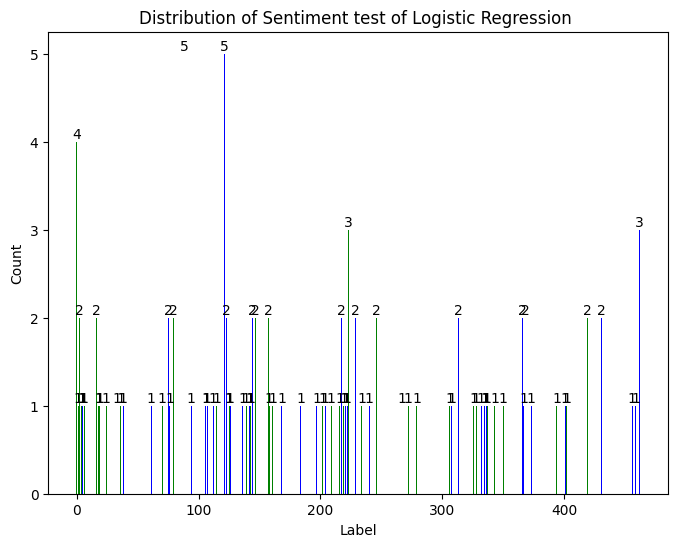

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

lr_predictions_pd = predictions.toPandas()

lr_sentiment_counts = lr_predictions_pd['prediction'].value_counts()

colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(lr_sentiment_counts.index, lr_sentiment_counts.values, color=colors)

for x, y in zip(lr_sentiment_counts.index, lr_sentiment_counts.values): plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment test of Logistic Regression ')

plt.show()





In [50]:
from pyspark.ml.feature import Tokenizer

# جمله مورد نظر
sentence = "قیمت دلار عالی و رو به کاهش است"

# ایجاد دیتافریمی حاوی جمله مورد نظر
sentence_df = spark.createDataFrame([(sentence,)], ["text"])

# تبدیل جمله به لیست کلمات با استفاده از Tokenizer
tokenizer = Tokenizer(inputCol="text", outputCol="words")
words = tokenizer.transform(sentence_df)

# استفاده از مدل Word2Vec برای تبدیل کلمات به بردارهای ویژگی
words_with_features = word2Vec_model.transform(words)

# استفاده از مدل Logistic Regression برای پیش‌بینی احساس مثبت یا منفی
prediction = model.transform(words_with_features).select("prediction").collect()[0][0]

# تشخیص احساس مثبت یا منفی بر اساس نتیجه پیش‌بینی
if prediction == 1.0:
    sentiment = "مثبت"
else:
    sentiment = "منفی"

print(f"جمله '{sentence}' به عنوان یک احساس {sentiment} تشخیص داده شد.")


جمله 'قیمت دلار عالی و رو به کاهش است'  به عنوان یک احساس مثبت تشخیص داده شد.
